In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
from sklearn.model_selection import train_test_split

In [80]:
optdigits_df=pd.read_csv('optdigits_csv.csv')

## To perform kmeans algorithm one has to follow these steps:
1. Decide the number of cluster in our case there are 10 digits to be classified so 10 clusters.
2. Initialize the centroid
3. Assign to each point in the dataset a centroid, respective centroid are assigned to each point by calculating the shortest distance between centroid and point.
4. Calculate the new centroid by calculating mean of all points assigned to the centroid.
5. Repeat the algorithm till value in centroid doesnt change

In [81]:
def test_train_splitter(optdigits_df):
    X,Y = train_test_split(optdigits_df,test_size=0.20, random_state=1)
    division = X.shape[1] - 1
    print(division)
    X_without_label = X.iloc[:,0:division].values 
    X_with_label = X.iloc[:,:].values
    Y_data = Y.iloc[:,0:division].values  
    Y_label = Y.iloc[:,division].values 
    return X_with_label,X_without_label,Y_data,Y_label

## Step 2 Centroid initialization
In this step centroids are initialized.    
It is ensured that centroids are initialized from each digit. 

In [82]:
def centroid_initialization(X_with_label,X_without_label):    
    i = 0
    Centroids=np.array([]).reshape(no_of_features,0)
    while(i<10):
        rand=rd.randint(0,m-1)
        # A point is guessed and label is correlated with i whose value varies from 0 - 10
        # If value of label is mached with i it is added in centroids
        # i is incremented
        if(X_with_label[rand,no_of_features] == i):
            Centroids=np.c_[Centroids,X_without_label[rand]]
            i = i + 1
    return Centroids

## K-Means Algorithm
From centroid EuclidianDistance is calculated with each Point and a cluster is assigned to a point based on the shortest distance with the cluster.  
Mean is calculated from each point in a respective centroid and is used as a new centroid.   

In [83]:
def kmeans_algorithm(X_with_label,X_without_label,Centroids):
    num_iter=100
    Output={} #output that will store each point in a cluster
    for n in range(100):
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X_without_label-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1) # cluster for each point based on shortest distance from a centroid 
        #Calculating new mean
        Z={}
        for k in range(K):
            Z[k]=np.array([]).reshape(no_of_features,0)
            Output[k]=np.array([]).reshape(no_of_features+1,0)
        for i in range(m):
            Z[C[i]]=np.c_[Z[C[i]],X_without_label[i]]
            Output[C[i]]=np.c_[Output[C[i]],X_with_label[i]]     
        for k in range(K):
            Z[k]=Z[k].T
        for k in range(K):
            Centroids[:,k]=np.mean(Z[k],axis=0)
        return Output

### Showing all digits present in a cluster based on their labels

In [84]:
def print_number_in_all_cluster(Output):
    for i  in range(0,10):
        print("cluster "+str(i))
        print("Number of elements in a cluster: " + str(Output[i].shape[1]))
        print(Output[i][no_of_features,:])

### visualizing points based on their features

In [85]:
def visualize_50_digits_in_cluster(Output):
    for j in range(0,10):
        plt.figure(figsize=(30,10))
        print('Cluster ' + str(j))
        numOfRows = 50
        print(str(Output[j].shape[1]) + " elements")
        for i in range(0,50):
            plt.subplot(5+1,10,i+1)
            image = Output[j][0:no_of_features,i]
            image = image.reshape(8,8)
            plt.imshow(image,cmap='gray')
            plt.axis('off')
        plt.show()

## Measuring Accuracy
The accuracy is Measured by calculating which cluster the data belongs and assigning the value of the respective cluster.  
Comparing how many are correctly identified and dividing with number of test data.

In [86]:
def measuring_accuracy(Centroids,Y_data,Y_label):
    number_of_test_data = Y_data.shape[0]
    EuclidianDistance=np.array([]).reshape(number_of_test_data,0)
    for k in range(K):
        tempDist=np.sum((Y_data-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    predicted_value=np.argmin(EuclidianDistance,axis=1)
    number_of_correct_prediction = 0
    for i in range(0,predicted_value.shape[0]):
        if(predicted_value[i] == Y_label[i]):
            number_of_correct_prediction = number_of_correct_prediction + 1
    accuracy = number_of_correct_prediction/number_of_test_data * 100
    print('Accurcy in test Dataset:')
    print(accuracy)

In [87]:
X_with_label,X_without_label,Y_data,Y_label = test_train_splitter(optdigits_df)
m = X_without_label.shape[0]
no_of_features = X_without_label.shape[1]
print('No ' , no_of_features)
K=10
Centroids = centroid_initialization(X_with_label,X_without_label)
Output = kmeans_algorithm(X_with_label,X_without_label,Centroids)

64
No  64


Cluster 0
591 elements


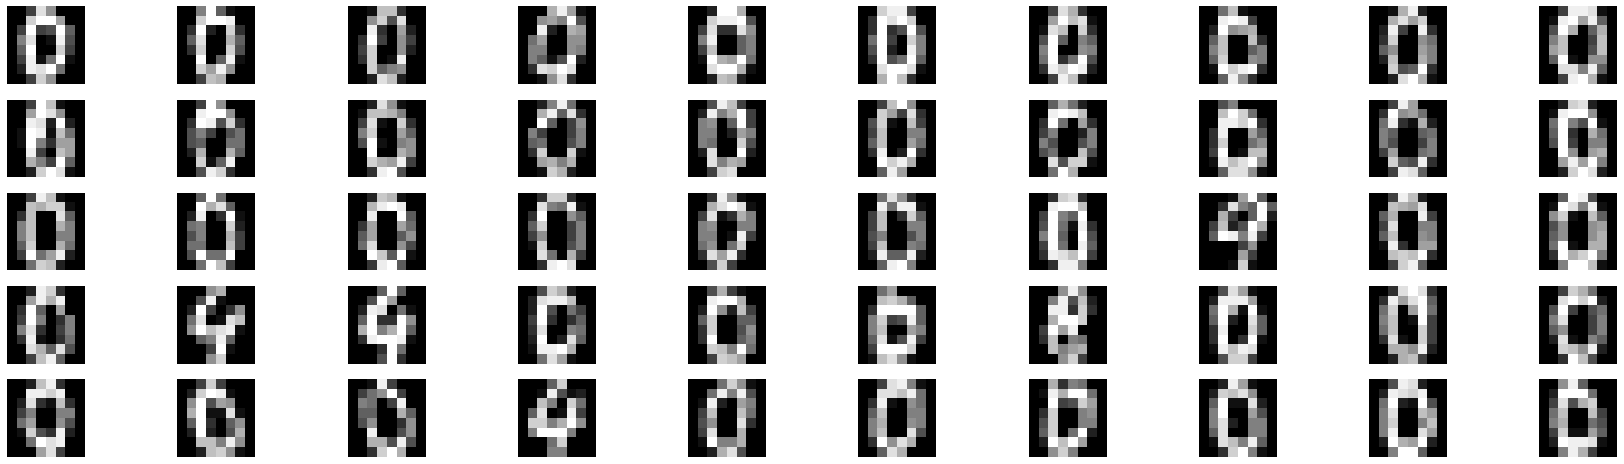

Cluster 1
318 elements


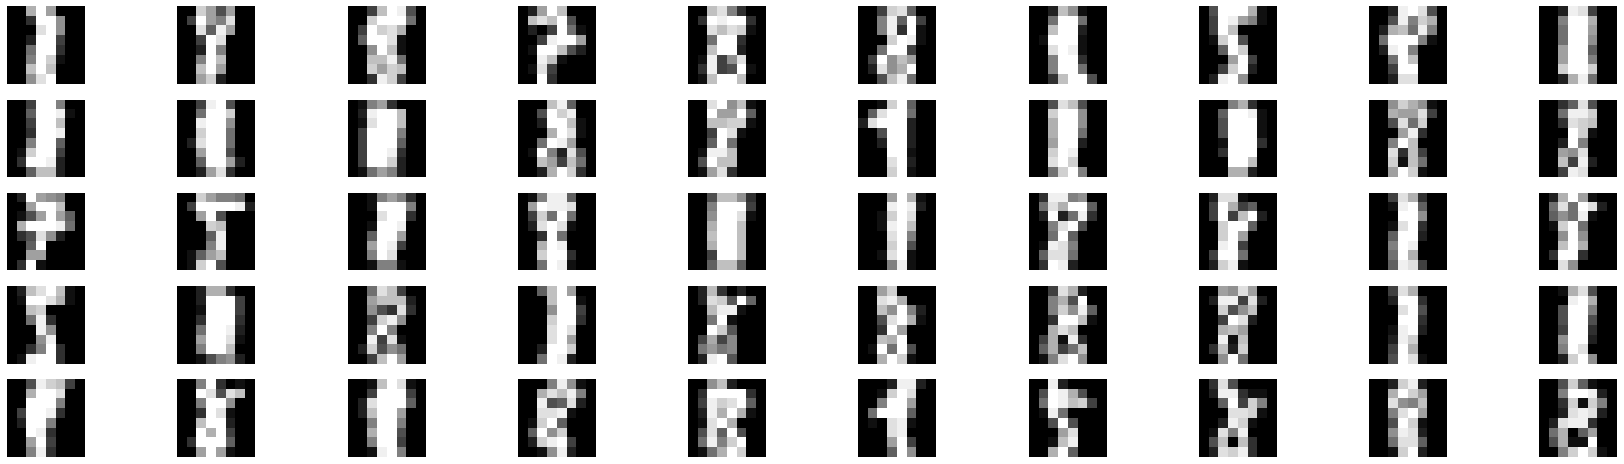

Cluster 2
526 elements


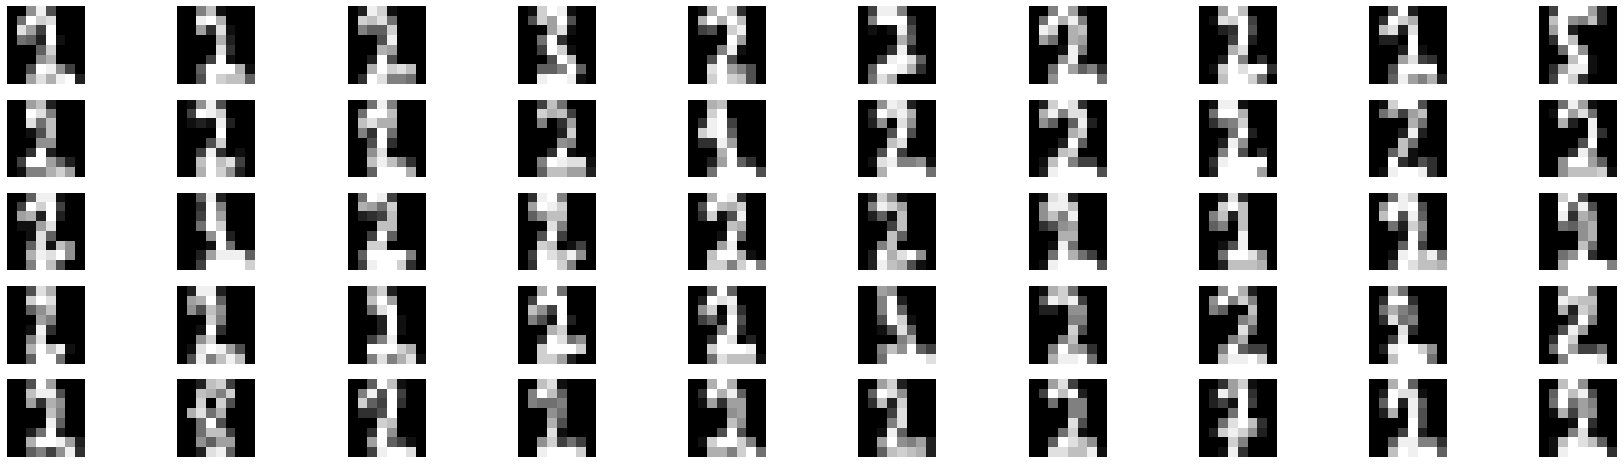

Cluster 3
353 elements


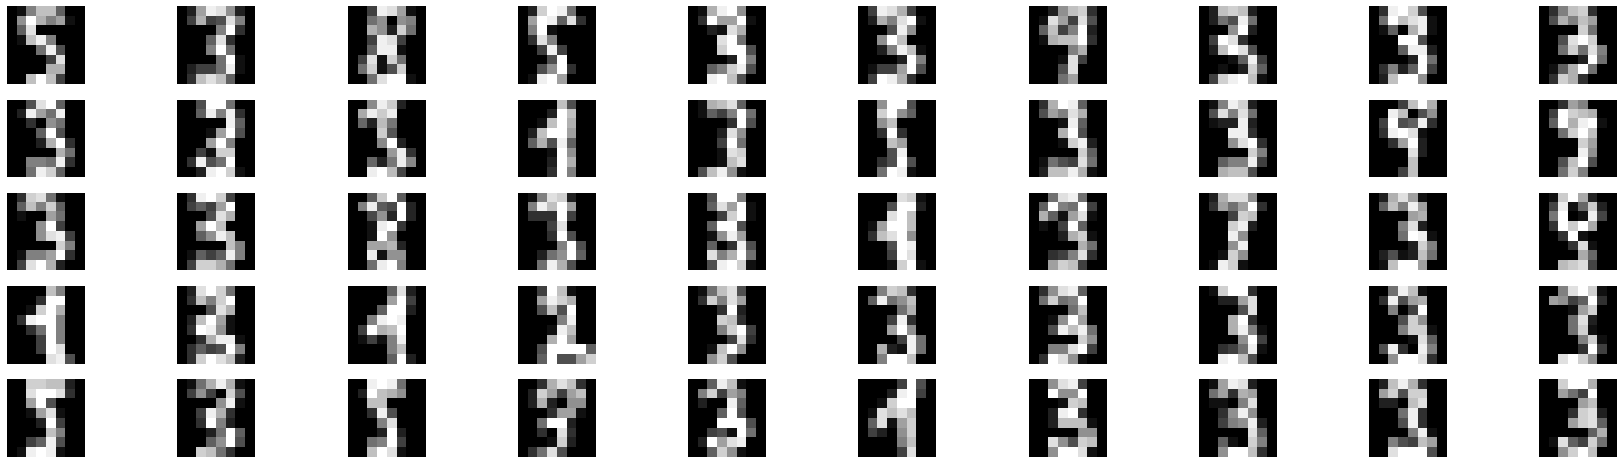

Cluster 4
467 elements


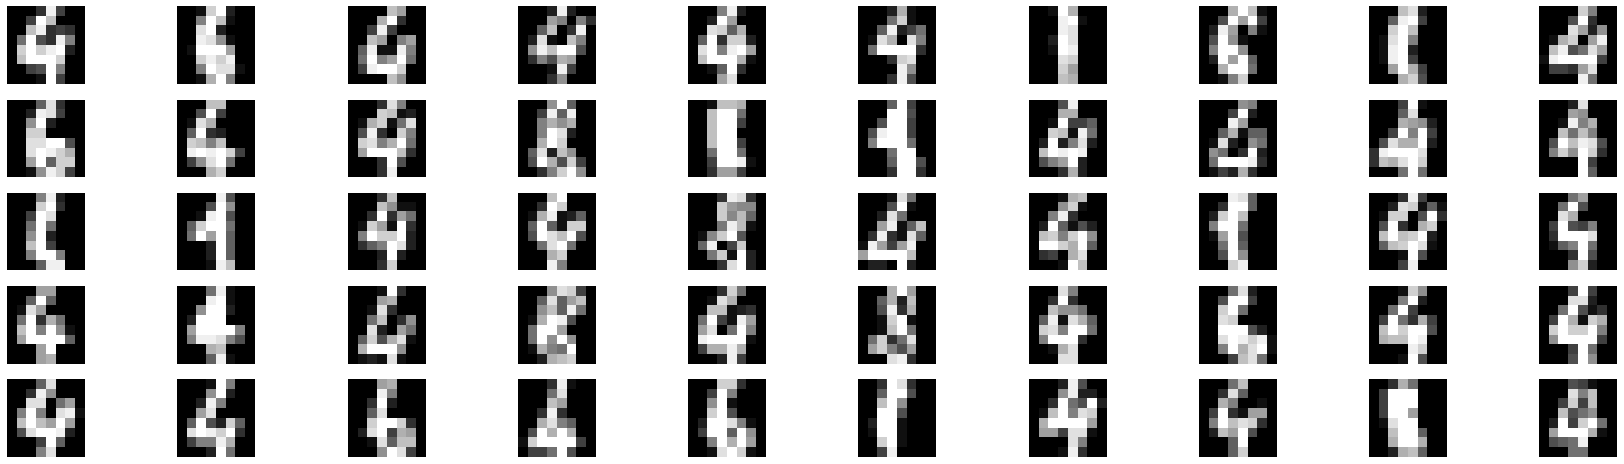

Cluster 5
592 elements


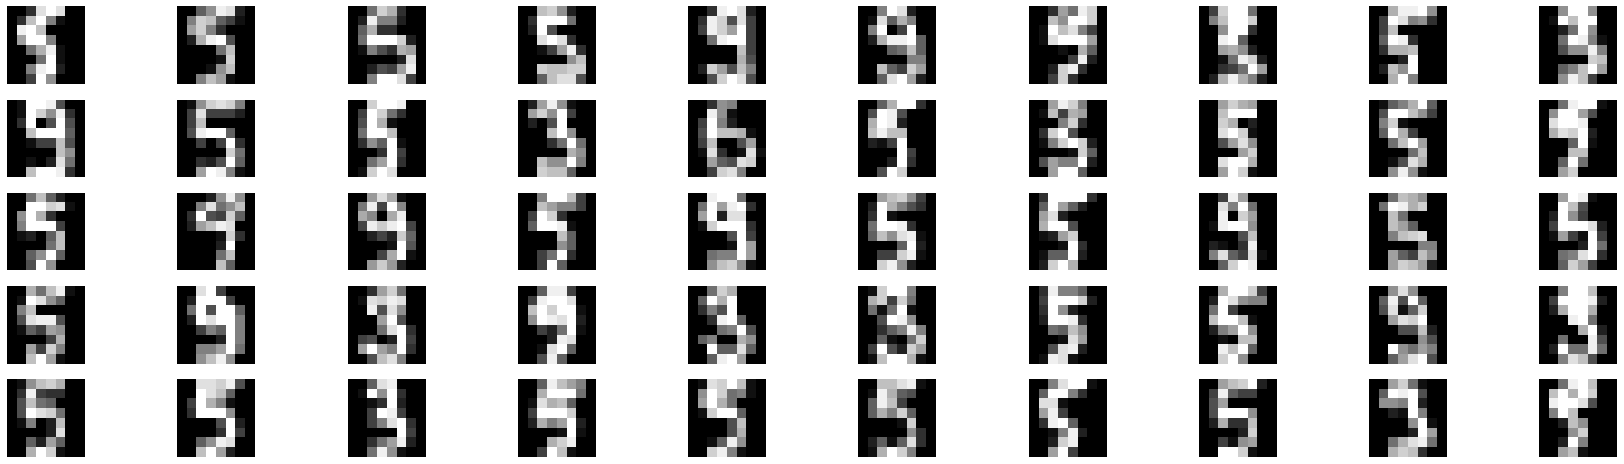

Cluster 6
334 elements


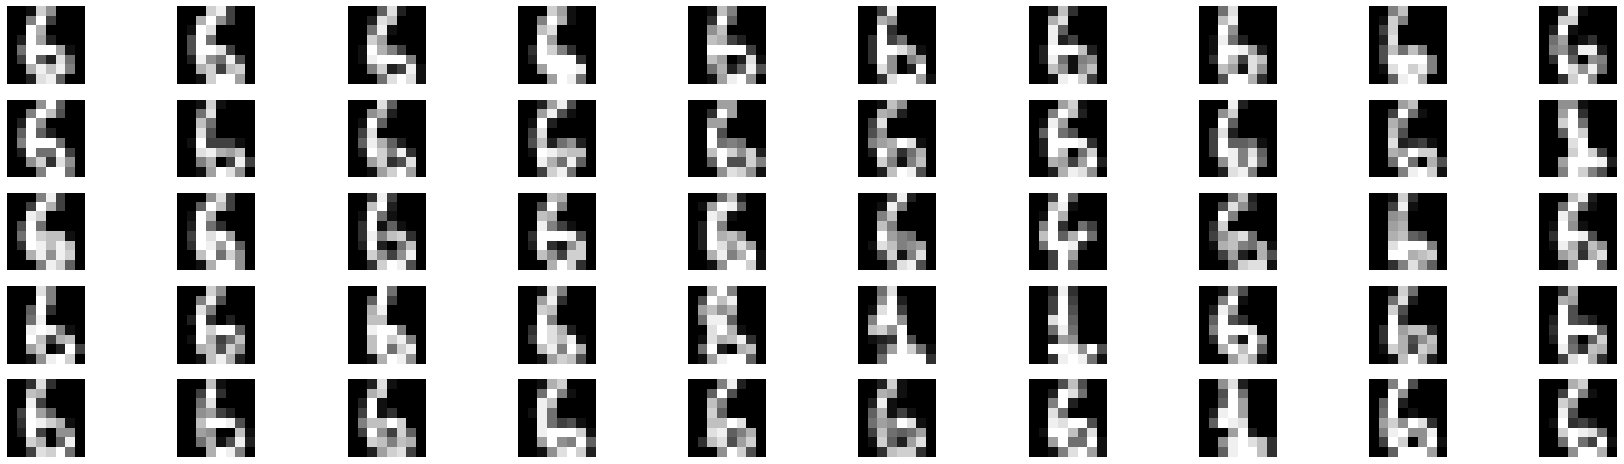

Cluster 7
465 elements


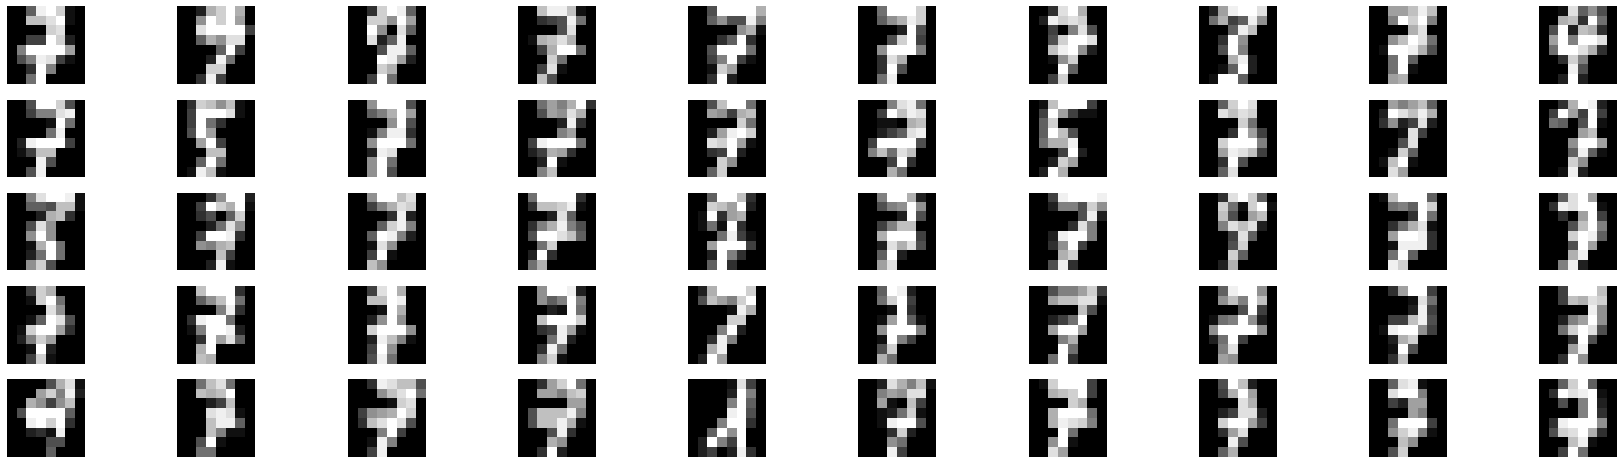

Cluster 8
577 elements


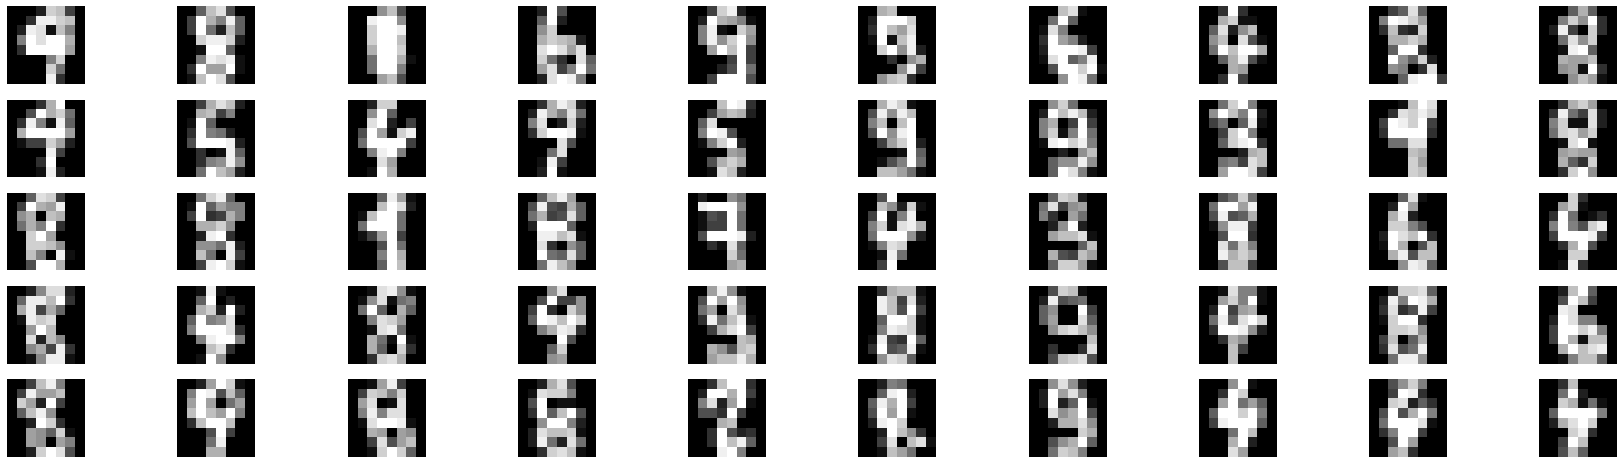

Cluster 9
273 elements


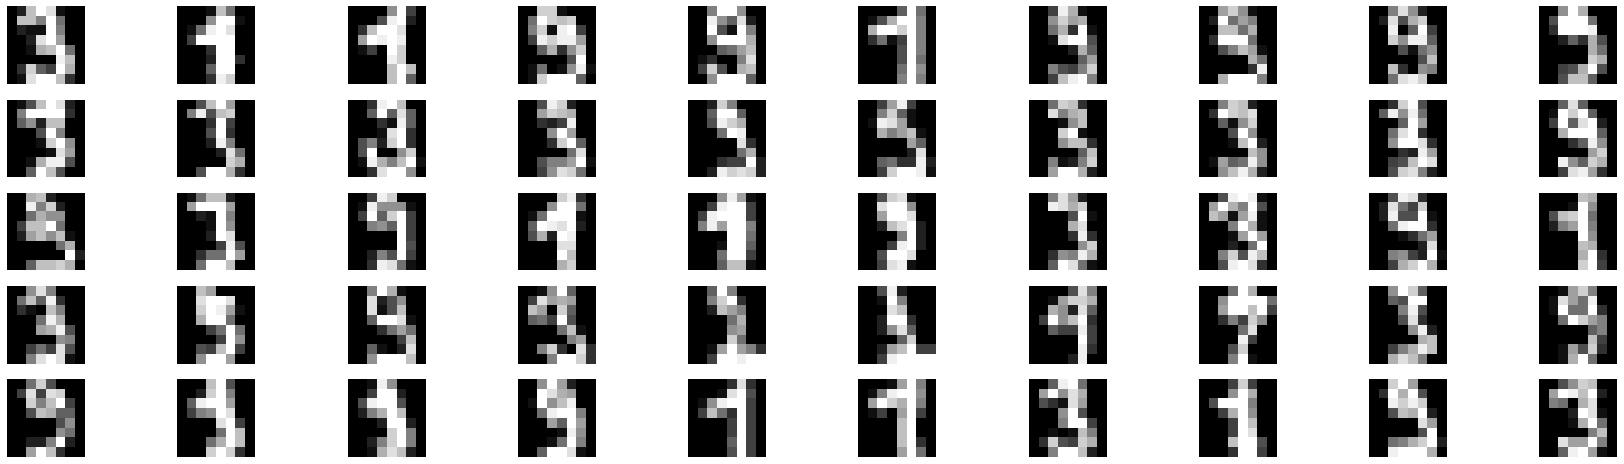

In [88]:
visualize_50_digits_in_cluster(Output)

In [89]:
print_number_in_all_cluster(Output)

cluster 0
Number of elements in a cluster: 591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 9. 0. 0. 0. 4. 4. 0. 0. 0. 8. 0. 0. 0. 0. 0. 0. 4. 0. 0. 0. 0.
 0. 0. 5. 4. 0. 0. 0. 6. 2. 5. 0. 0. 5. 0. 8. 5. 5. 0. 0. 5. 0. 0. 6. 0.
 0. 0. 4. 0. 0. 4. 0. 8. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 5. 0.
 0. 7. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0.
 5. 0. 0. 0. 0. 0. 0. 4. 0. 8. 0. 0. 0. 4. 6. 0. 4. 0. 4. 8. 0. 5. 0. 0.
 0. 6. 0. 0. 0. 0. 4. 0. 0. 0. 5. 0. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 6. 0. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 4. 0. 0. 0. 0. 0.
 6. 0. 8. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 8. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 8. 0. 8. 2. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0. 6. 0. 0.
 5. 0. 0. 6. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 9. 6. 5. 0. 0. 0. 6. 5. 0.
 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 5. 0. 4. 0. 0.
 0. 4. 5. 0. 0. 0. 0. 0. 8. 0. 0. 6. 0. 4. 0. 0. 0. 0. 0. 0. 5. 4. 0. 8.
 0. 

In [90]:
measuring_accuracy(Centroids,Y_data,Y_label)

Accurcy in test Dataset:
73.04270462633453


In [103]:
array = np.arange(5620*65).reshape(5620,65)

In [104]:
array

array([[     0,      1,      2, ...,     62,     63,     64],
       [    65,     66,     67, ...,    127,    128,    129],
       [   130,    131,    132, ...,    192,    193,    194],
       ...,
       [365105, 365106, 365107, ..., 365167, 365168, 365169],
       [365170, 365171, 365172, ..., 365232, 365233, 365234],
       [365235, 365236, 365237, ..., 365297, 365298, 365299]])

In [109]:
array[:,0:64]

array([[     0,      1,      2, ...,     61,     62,     63],
       [    65,     66,     67, ...,    126,    127,    128],
       [   130,    131,    132, ...,    191,    192,    193],
       ...,
       [365105, 365106, 365107, ..., 365166, 365167, 365168],
       [365170, 365171, 365172, ..., 365231, 365232, 365233],
       [365235, 365236, 365237, ..., 365296, 365297, 365298]])

In [106]:
array.shape

(5620, 65)

In [108]:
array[:,64]

array([    64,    129,    194, ..., 365169, 365234, 365299])